In [50]:
#Hierarchical Density Based Spatial Clustering of Application with Noise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [51]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 1.0, 'customer data')

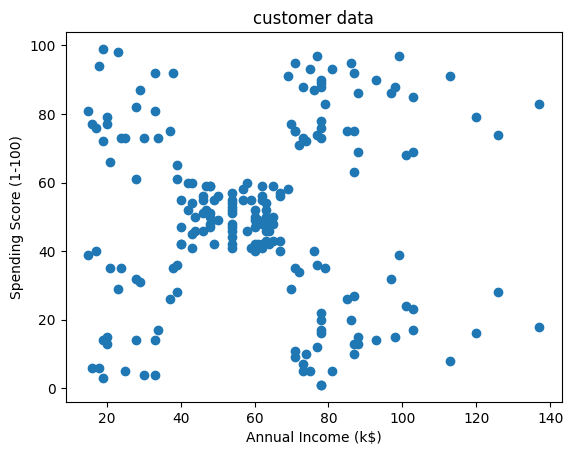

In [52]:
plot.scatter(dataset["Annual Income (k$)"],dataset["Spending Score (1-100)"])
plot.xlabel("Annual Income (k$)")
plot.ylabel("Spending Score (1-100)")
plot.title("customer data")

In [53]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [54]:
# min_cluster_size is the minimum number of samples in a group for that group to be considered a cluster.
#Clusters smaller than the ones of this size will be left as noise.

#min_samples is the number of samples in a neighborhood for a point to be considered as a core point, including the point itself. 

from sklearn.cluster import HDBSCAN
hdbscan=HDBSCAN(min_cluster_size=5,min_samples=6)
y_label=hdbscan.fit_predict(x)
y_label

array([-1,  4,  1,  4, -1,  4,  1, -1,  1,  4,  1, -1,  1,  4,  1,  4,  3,
       -1, -1, -1,  3,  4,  1,  4,  1,  4, -1, -1,  3, -1,  1,  4, -1, -1,
        1,  4, -1,  4, -1, -1,  3, -1,  3,  3, -1,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0,  2,  0,  3,  0,  2,  0,  2,  0,  3,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  3,  0,  2,  0,  3,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [55]:
from sklearn.metrics import silhouette_score
sil_score=silhouette_score(x,y_label)
sil_score

np.float64(0.38607900923470306)

In [56]:
#append the cluster group in the original dataset as a separate column
supervised=pd.DataFrame(dataset)
supervised["clustering_group"]=y_label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clustering_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


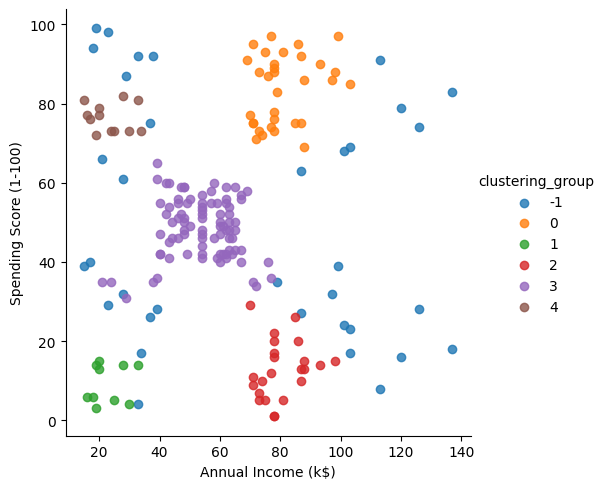

In [57]:
sns.lmplot(supervised, x=supervised.columns[3],y=supervised.columns[4], hue=supervised.columns[5],fit_reg=False)